# Algorithmic Trading Strategy with EMA And RSI

## Introduction
In this project, we aim to develop a simple yet effective trading simulator/backtester using Python. The objective is to simulate trading strategies based on predefined signals derived from technical indicators, such as Exponential Moving Averages (EMAs) and Relative Strength Index (RSI). The system will utilize historical data extracted via yfinance to simulate trades and evaluate the performance of the strategies. The simulator will start with an initial capital of 10,000 units and incorporate entry and exit signals, including profit-booking and stop-loss rules. The results will include detailed trade metrics and visualizations, offering insights into the overall performance and profitability of the trading strategy.


## Installing required dependencies

In [8]:
!pip install  pandas yfinance pandas-ta plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=22512b047a1511647061eeb7d8e98b218ba850a10d35b6cd88cdd3f0ad6018a7
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


## Fetching and Preparing Data for Trading Simulation

This section of the code demonstrates the process of fetching historical data for Microsoft (MSFT) from Yahoo Finance, saving it as a CSV file, and preparing the dataset for further analysis and simulation.
Code Steps:



In [9]:
import pandas as pd
import yfinance as yf
import datetime as dt
import pandas_ta as ta
# Load Microsoft data from Yahoo Finance
start_date = "2018-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")
data = yf.download("MSFT", start=start_date, end=end_date)
data_df = pd.DataFrame(data)
data_df.to_csv('msft.csv')


[*********************100%***********************]  1 of 1 completed


## Data Preprocessing

In [23]:
# Data Preprocessing
df = pd.read_csv('msft.csv', parse_dates=True, index_col=0)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
for column in ['Close', 'Low', 'High', 'Open', 'Volume']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.index.name = 'Date'
df.dropna(inplace=True)

<ipython-input-23-feb971f6c630>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('msft.csv', parse_dates=True, index_col=0)


In [24]:
data=df
data.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,79.800286,79.967058,79.216588,79.633514,22483800.0
2018-01-03,79.735454,80.152388,79.652071,80.004143,26061400.0
2018-01-04,80.226478,81.217850,80.207951,80.708267,21912000.0
2018-01-05,81.217851,81.912734,81.004751,81.708900,23407100.0
2018-01-08,81.718160,82.070238,81.162255,81.792282,22113000.0
2018-01-09,82.135094,82.209216,81.403150,81.736694,19484300.0
2018-01-10,81.403150,81.708900,80.986224,81.366089,18652200.0
2018-01-11,81.653316,81.653316,80.828723,81.606995,17808900.0
2018-01-12,82.153620,83.182046,81.949786,83.015274,24271500.0


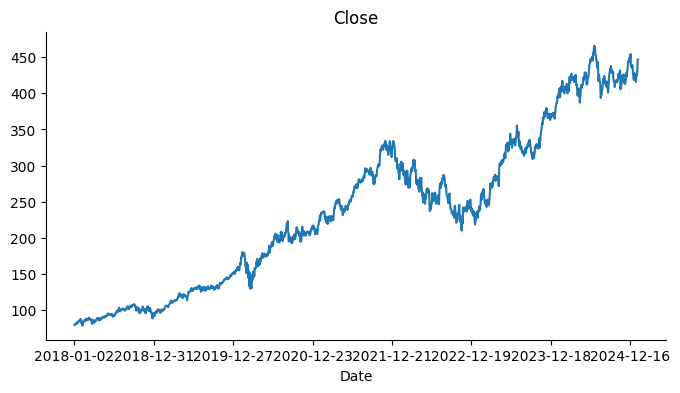

In [25]:
from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

##EMA and RSI calculation
**Exponential Moving Average (EMA)**


*   EMA is a type of moving average that places greater weight on more recent data points, making it more responsive to recent price changes.
*  It is used to identify trends and potential reversals in financial markets.
*  Formula:
  $$
  EMA_t = (Price_t \times \frac{2}{n+1}) + (EMA_{t-1} \times (1 - \frac{2}{n+1}))
  $$
     

> Where n is the period of the EMA.


* Common EMA periods include 10, 20, and 50, depending on the time frame and strategy.
* A crossover of short-term and long-term EMAs often signals a potential buy or sell opportunity.

**Relative Strength Index (RSI):**

* RSI is a momentum oscillator that measures the speed and change of price movements.
* It ranges from 0 to 100 and is used to identify overbought or oversold conditions in the market.
*  Formula:
  $$
  RSI = 100 - \frac{100}{1 + RS}, \quad RS = \frac{\text{Average Gain over n periods}}{\text{Average Loss over n periods}}
  $$
* Overbought: RSI > 70 (may indicate a potential reversal to the downside).
* Oversold: RSI < 30 (may indicate a potential reversal to the upside).
* Commonly used periods for RSI are 14 days or 14 candles.



In [26]:
data['10_EMA'] = data.ta.ema(length=10)
data['20_EMA'] = data.ta.ema(length=20)
data['RSI'] = data.ta.rsi(length=14)

In [27]:
data.head(20)

,Open,High,Low,Close,Volume,10_EMA,20_EMA,RSI
Date,,,,,,,,
2018-01-02,79.800286,79.967058,79.216588,79.633514,22483800.0,NaN,NaN,NaN
2018-01-03,79.735454,80.152388,79.652071,80.004143,26061400.0,NaN,NaN,NaN
2018-01-04,80.226478,81.217850,80.207951,80.708267,21912000.0,NaN,NaN,NaN
2018-01-05,81.217851,81.912734,81.004751,81.708900,23407100.0,NaN,NaN,NaN
2018-01-08,81.718160,82.070238,81.162255,81.792282,22113000.0,NaN,NaN,NaN
2018-01-09,82.135094,82.209216,81.403150,81.736694,19484300.0,NaN,NaN,NaN
2018-01-10,81.403150,81.708900,80.986224,81.366089,18652200.0,NaN,NaN,NaN
2018-01-11,81.653316,81.653316,80.828723,81.606995,17808900.0,NaN,NaN,NaN
2018-01-12,82.153620,83.182046,81.949786,83.015274,24271500.0,NaN,NaN,NaN


In [28]:
#Removeing all the NaN values
data.dropna(inplace=True)
data.head(20)
nan_count = data.isna().sum().sum()

print(f"Total NaN values in the dataset: {nan_count}")

Total NaN values in the dataset: 0


In [29]:
data.describe()

,Open,High,Low,Close,Volume,10_EMA,20_EMA,RSI
count,1756.000000,1756.000000,1756.000000,1756.000000,1.756000e+03,1756.000000,1756.000000,1756.000000
mean,240.864510,243.190200,238.402942,240.906538,2.843871e+07,240.016510,239.026176,55.270715
std,107.534911,108.309592,106.653021,107.524771,1.241732e+07,107.205965,106.911774,10.764302
min,79.957810,82.394528,77.669329,78.762589,7.164500e+06,83.088671,83.156200,24.706321
25%,134.273730,135.574814,132.960885,134.109673,2.031335e+07,133.182725,132.513216,47.698024
50%,239.571104,241.754399,236.867752,239.653633,2.543580e+07,239.324830,240.312897,55.014986
75%,318.539144,322.608875,315.823769,318.784279,3.269340e+07,319.687479,319.031613,63.398499
max,465.228569,466.573450,462.698189,465.786438,1.112421e+08,457.404605,450.537572,84.440518


In [30]:
print( 55.270709-10.764295)
print( 55.270709+10.764295)

44.50641399999999
66.035004


## EMA 10, and EMA 20 crossover and RSI visualization

In [77]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# First subplot: Price and EMAs (using go.Scatter for line charts)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price', line=dict(color='white')))
fig.add_trace(go.Scatter(x=data.index, y=data['10_EMA'], mode='lines', name='EMA(10)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['20_EMA'], mode='lines', name='EMA(20)', line=dict(color='red')))

# Update layout for the first plot
fig.update_layout(
    title='Price and EMAs',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark',
    showlegend=True
)
# Second
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI', line=dict(color='green')))

fig.add_trace(go.Scatter(x=data.index, y=[30]*len(data), mode='lines', name='RSI < 30 (Oversold)', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=[50]*len(data), mode='lines', name='RSI < 50', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=[70]*len(data), mode='lines', name='RSI > 70 (Overbought)', line=dict(color='red', dash='dash')))


fig.update_layout(
    title='RSI Indicator',
    xaxis_title='Date',
    yaxis_title='RSI',
    showlegend=True
)

fig.show()


In [78]:
# Just check if EMA(10) is greater than EMA(20) and RSI < 30
condition = (data['10_EMA'] > data['20_EMA'] )& (data['RSI'] < 30)

# Print occurrences of this condition
print("Condition (EMA_Short > EMA_Long and RSI < 30):")
print(condition.value_counts())

Condition (EMA_Short > EMA_Long and RSI < 30):
False    1756
Name: count, dtype: int64


In [79]:
# Just check if EMA(10) is lesser than EMA(20) and RSI < 66.035004
condition = (data['10_EMA'] < data['20_EMA']) & (data['RSI'] > 70)

# Print occurrences of this condition
print("Condition (EMA_Short > EMA_Long and RSI < 40):")
print(condition.value_counts())

Condition (EMA_Short > EMA_Long and RSI < 40):
False    1756
Name: count, dtype: int64


## Buy Signal Adjustment

During testing, it was observed that there were no data points where the following condition was met:

- **EMA(10) > EMA(20) and RSI < 30**

To address this, the RSI threshold was adjusted to a level that provided the highest number of buy signals while maintaining the integrity of the strategy. The adjusted buy condition is as follows:

- **EMA(10) > EMA(20) and RSI < [Adjusted RSI Threshold]**

This change ensures a more robust identification of potential buy opportunities, enhancing the strategy's applicability to the tested dataset
## Sell Signal
Since The market is showing a upward trend I have used the overbought indicator which is > 70 but there are no sell signal so my stratergy uses the profit percentage limit as the limit.

In [80]:
def getSignals(data):
    # Initialize signal column with 0 (Hold)
    data['Signal'] = 0

    # Buy signal: EMA(10) crosses above EMA(20) and RSI < 30
    data.loc[(data['10_EMA'] > data['20_EMA']) & (data['RSI'] < 50), 'Signal'] = 1  # Buy signal

    # Sell signal: EMA(10) crosses below EMA(20) and RSI > 70
    data.loc[(data['10_EMA'] < data['20_EMA']) & (data['RSI'] > 70), 'Signal'] = -1  # Sell signal

    return data

data = getSignals(data)
print(data.head())


                 Open       High        Low      Close      Volume     10_EMA  \
Date                                                                            
2018-01-30  86.443334  86.776878  85.331519  85.924484  38635100.0  85.129278   
2018-01-31  86.860275  88.389018  86.637915  88.027679  48756300.0  85.656260   
2018-02-01  87.823851  89.009782  86.702775  87.332802  47227900.0  85.961086   
2018-02-02  86.758381  87.064131  84.775651  85.035072  47867800.0  85.792720   
2018-02-05  83.904699  86.387745  81.532837  81.532837  51031500.0  85.018195   

               20_EMA        RSI  Signal  
Date                                      
2018-01-30  83.226987  71.277650       0  
2018-01-31  83.684196  78.177390       0  
2018-02-01  84.031682  72.021533       0  
2018-02-02  84.127243  56.249112       0  
2018-02-05  83.880157  41.375654       1  


In [81]:
data['Signal'].value_counts()

,count
Signal,
0,1639
1,117


In [82]:
import pandas as pd
import numpy as np

def backtest(data, initialBalance=10000, stopLossPct=0.05, takeProfitPct=0.10):
    """Backtest the strategy with stop loss and take profit conditions."""
    balance = initialBalance
    position = 0
    entryPrice = 0
    num_trades = 0
    trade_details = []

    for i in range(1, len(data)):
        # Buy signal: EMA(10) crosses above EMA(20) and RSI < 38
        if data['Signal'].iloc[i] == 1 and position == 0:  # Buy signal
            entryPrice = data['Open'].iloc[i]  # Enter trade at the open price of the next bar
            position = balance / entryPrice  # Buy as many shares as possible
            balance = 0  # Use all balance
            numTrades += 1
            print(f"Trade {numTrades}: Bought {position:.2f} shares at ${entryPrice:.2f}")

        # Sell signal: EMA(10) crosses below EMA(20) and RSI > 58.5
        elif data['Signal'].iloc[i] == -1 and position > 0:  # Sell signal
            exitPrice = data['Close'].iloc[i]  # Exit trade at the open price of the next bar
            balance = position * exitPrice  # Sell all shares
            profitLoss = balance - initialBalance
            trade_details.append({
                'Entry Price': entryPrice,
                'Exit Price': exitPrice,
                'Profit/Loss': profitLoss,
                'Entry Date': data.index[i - 1],
                'Exit Date': data.index[i],
                'Exit Reason': 'Sell Signal'
            })
            print(f"Trade {num_trades}: Sold at ${exitPrice:.2f} for a profit/loss of ${profitLoss:.2f}")
            position = 0  # Reset position

        # Check stop loss and take profit during the trade
        if position > 0:
            # Calculate current position value at the current day's open price
            current_value = position * data['Open'].iloc[i]
            profitLoss = current_value - (position * entryPrice)  # Profit or loss based on entry price
            change_pct = profitLoss / (position * entryPrice)

            # Check stop loss condition (loss of 5%)
            if change_pct <= -stopLossPct:
                exitPrice = data['Open'].iloc[i]  # Sell at the open price
                balance = current_value
                trade_details.append({
                    'Entry Price': entryPrice,
                    'Exit Price': exitPrice,
                    'Profit/Loss': profitLoss,
                    'Entry Date': data.index[i - 1],
                    'Exit Date': data.index[i],
                    'Exit Reason': 'Stop Loss Hit'
                })
                print(f"Trade {num_trades}: Stop loss hit. Sold at ${exitPrice:.2f} for a profit/loss of ${profitLoss:.2f}")
                position = 0  # Reset position

            # Check take profit condition (gain of 10%)
            elif change_pct >= takeProfitPct:
                exitPrice = data['Open'].iloc[i]  # Sell at the open price
                balance = current_value
                trade_details.append({
                    'Entry Price': entryPrice,
                    'Exit Price': exitPrice,
                    'Profit/Loss': profitLoss,
                    'Entry Date': data.index[i - 1],
                    'Exit Date': data.index[i],
                    'Exit Reason': 'Take Profit Hit'
                })
                print(f"Trade {num_trades}: Take profit hit. Sold at ${exitPrice:.2f} for a profit/loss of ${profitLoss:.2f}")
                position = 0  # Reset position

    # After all trades, calculate the final profit/loss and return the results
    finalBalance = balance if position == 0 else position * data['Open'].iloc[-1]
    totalProfitLoss = finalBalance - initialBalance
    total_percentage_return = (totalProfitLoss / initialBalance) * 100

    print(f"\nTotal Profit/Loss: ${totalProfitLoss:.2f}")
    print(f"Total Percentage Return: {total_percentage_return:.2f}%")
    print(f"Total Number of Trades: {num_trades}")

    # Return trade details as a DataFrame
    trade_details_df = pd.DataFrame(trade_details)
    return finalBalance, trade_details_df, num_trades

# Run the backtest with stop-loss and take-profit
finalBalance, trade_details_df, num_trades = backtest(data)

# Display trade details
print("Trade Details:")
print(trade_details_df)

# Display overall results
totalProfitLoss = finalBalance - 10000  # Total profit/loss from the initial balance
total_percentage_return = (totalProfitLoss / 10000) * 100

print(f"\nTotal Profit/Loss: ${totalProfitLoss:.2f}")
print(f"Total Percentage Return: {total_percentage_return:.2f}%")
print(f"Total Number of Trades: {num_trades}")

# Save to CSV for review
trade_details_df.to_csv("ema_rsi_strategy.csv")


Trade 1: Bought 119.18 shares at $83.90
Trade 1: Take profit hit. Sold at $92.30 for a profit/loss of $1000.86
Trade 2: Bought 117.67 shares at $93.49
Trade 2: Take profit hit. Sold at $103.53 for a profit/loss of $1181.49
Trade 3: Bought 121.41 shares at $100.34
Trade 3: Stop loss hit. Sold at $92.07 for a profit/loss of $-1004.71
Trade 4: Bought 113.07 shares at $98.85
Trade 4: Take profit hit. Sold at $109.18 for a profit/loss of $1167.28
Trade 5: Bought 105.08 shares at $117.48
Trade 5: Take profit hit. Sold at $130.59 for a profit/loss of $1377.51
Trade 6: Bought 102.93 shares at $133.32
Trade 6: Stop loss hit. Sold at $126.65 for a profit/loss of $-687.44
Trade 7: Bought 100.10 shares at $130.22
Trade 7: Take profit hit. Sold at $143.83 for a profit/loss of $1361.61
Trade 8: Bought 89.47 shares at $160.91
Trade 8: Stop loss hit. Sold at $146.18 for a profit/loss of $-1318.06
Trade 9: Bought 65.63 shares at $199.27
Trade 9: Take profit hit. Sold at $219.99 for a profit/loss of $13

In [60]:
import pandas as pd
import plotly.graph_objects as go

def plot_data_with_plotly(data, trade_details):
    """Plot the data with signals and trades using Plotly."""
    # Convert the index to DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Create the Candlestick chart
    fig = go.Figure(data=[go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name="Candlestick"
    )])

    # Add EMA(10) and EMA(20)
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data['10_EMA'],
        mode='lines',
        name='EMA(10)',
        line=dict(color='blue', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=data.index,
        y=data['20_EMA'],
        mode='lines',
        name='EMA(20)',
        line=dict(color='red', dash='dash')
    ))

    # Add Buy and Sell signals
    buy_signals = data[data['Signal'] == 1]
    sell_signals = data[data['Signal'] == -1]

    fig.add_trace(go.Scatter(
        x=buy_signals.index,
        y=buy_signals['Close'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=12)
    ))

    fig.add_trace(go.Scatter(
        x=sell_signals.index,
        y=sell_signals['Close'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=12)
    ))

    # Update layout with title and axis labels
    fig.update_layout(
        title="TSLA Trading Strategy",
        xaxis_title="Date",
        yaxis_title="Price",
        xaxis_rangeslider_visible=False,
        template="plotly_dark"
    )

    fig.show()

# Example usage
# Assuming `data` is the DataFrame with necessary columns and signals
# and `trade_details` is available
plot_data_with_plotly(data, trade_details_df)


In [69]:
!pip freeze > requirements.txt
